In [ ]:
import os
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Directory to store financial and news data
output_dir = "./financial_data"
os.makedirs(output_dir, exist_ok=True)


def fetch_financial_data(company_ticker):
    """
    Fetches financial data (balance sheet, income statement, cash flow)
    using Yahoo Finance. Supports NSE-listed companies by appending ".NS" to ticker.
    """
    print(f"Fetching financial data for {company_ticker}...")
    try:
        # Append '.NS' for Indian companies (NSE)
        # if not company_ticker.endswith(".NS"):
        #     company_ticker += ".NS"

        company = yf.Ticker(company_ticker)

        # Fetch and save financial data
        income_statement = company.financials
        balance_sheet = company.balance_sheet
        cash_flow = company.cashflow

        income_statement.to_csv(f"{output_dir}/{company_ticker}_income_statement.csv")
        balance_sheet.to_csv(f"{output_dir}/{company_ticker}_balance_sheet.csv")
        cash_flow.to_csv(f"{output_dir}/{company_ticker}_cash_flow.csv")

        print(f"Financial data saved in {output_dir}/")
    except Exception as e:
        print(f"Error fetching financial data: {e}")


def fetch_company_news(company_name):
    """
    Scrapes recent news articles related to the company using BeautifulSoup from Google News.
    """
    print(f"\nFetching news articles about {company_name}...")

    try:
        # Scraping Google News for the company
        google_news_url = f"https://news.google.com/search?q={company_name.replace(' ', '%20')}&hl=en-IN&gl=IN&ceid=IN:en"
        headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
        response = requests.get(google_news_url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find and save the top 5 news articles
        articles = soup.find_all('article')
        news_data = []
        print("\n--- Google News Articles ---")
        for article in articles[:5]:  # Fetch top 5 articles
            headline = article.find('h3').text if article.find('h3') else "No Title"
            link = "https://news.google.com" + article.find('a')['href'][1:]
            news_data.append({"Headline": headline, "Link": link})
            print(f"Title: {headline}\nLink: {link}\n")

        # Save news to CSV
        df_news = pd.DataFrame(news_data)
        df_news.to_csv(f"{output_dir}/{company_name}_news.csv", index=False)
        print(f"\nNews articles saved to {output_dir}/{company_name}_news.csv")

    except Exception as e:
        print(f"Error fetching news articles: {e}")


def main():
    """
    Main function to dynamically fetch data for any given company (Indian or US-based).
    """
    company_ticker = input("Enter the company ticker (e.g., INFY for Infosys, RELIANCE for Reliance): ").upper()
    company_name = input("Enter the full company name (e.g., Infosys Ltd, Reliance Industries): ")

    fetch_financial_data(company_ticker)
    fetch_company_news(company_name)
    print("\nData collection completed.")


if __name__ == "__main__":
    main()


Enter the company ticker (e.g., INFY for Infosys, RELIANCE for Reliance): INFY.NS
Enter the full company name (e.g., Infosys Ltd, Reliance Industries): Infosys Ltd
Fetching financial data for INFY.NS...
Financial data saved in ./financial_data/

Fetching news articles about Infosys Ltd...

--- Google News Articles ---
Title: No Title
Link: https://news.google.com/read/CBMijAJBVV95cUxNRTkyUEsxdzgxLWxIZmNtZkJsdzlBUElNQUtGN0t4MmxXejdBVlZpLV9tdlY1WGFpMUpZWU5DdXg0aEtTcEt3cy1SVVZWcFFET1lhd2x0di1td2c5dnF6NVROM0Jnc3BDYWpsSDNwZEZzMFZKX3hIdEV2UjFUNkxPR2w1OW1waVlFSzAzQVdkQW1FT3VBOG1NaV9scm5BRjRsR0lza0liX05QOG5DbUZNTk5vR3dxQTNPUjd3TXk1TUhLWEVCeXpkMjIwbEtPUmZMNW9HM3VaOV94REpxME9zUDlGTm5hX250UHROWUowbUZpblNtbGU5eWJiTU1lSDZsSy12QVM2MjNKWEZF0gGSAkFVX3lxTE1oVFE3NUd1R2oyaU1HZXoxSGEzMVhIeXBYV0ZGdEU3NDdkdHVVTmZrTk5mTWFVUkg5QzJSWlJEQVMyaGlmTFlLSGdmRUhzeW1EQU8yQUxlLTZpRlhXRHh3d1NYUDhiN1g1bjdwdWhab2s4U09TZGJ2dERxQS1LWUV4WTlTNmdaZ0prMjlMQ0hVVUEzLWYtLWlWeWExZm1nNHBTSkFPcG9UZ1pRQW1vWXdjOVItZGI2a0JxTC1jOW1RNVNNc


Plotting financial data for: INFY.NS


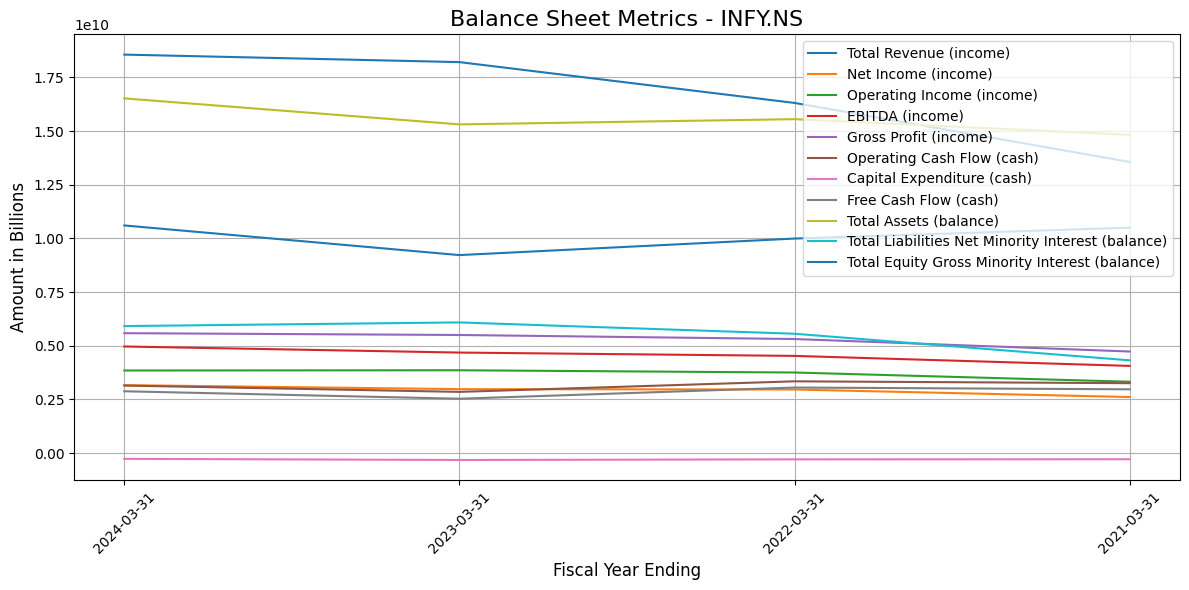


Plotting financial data for: AAPL


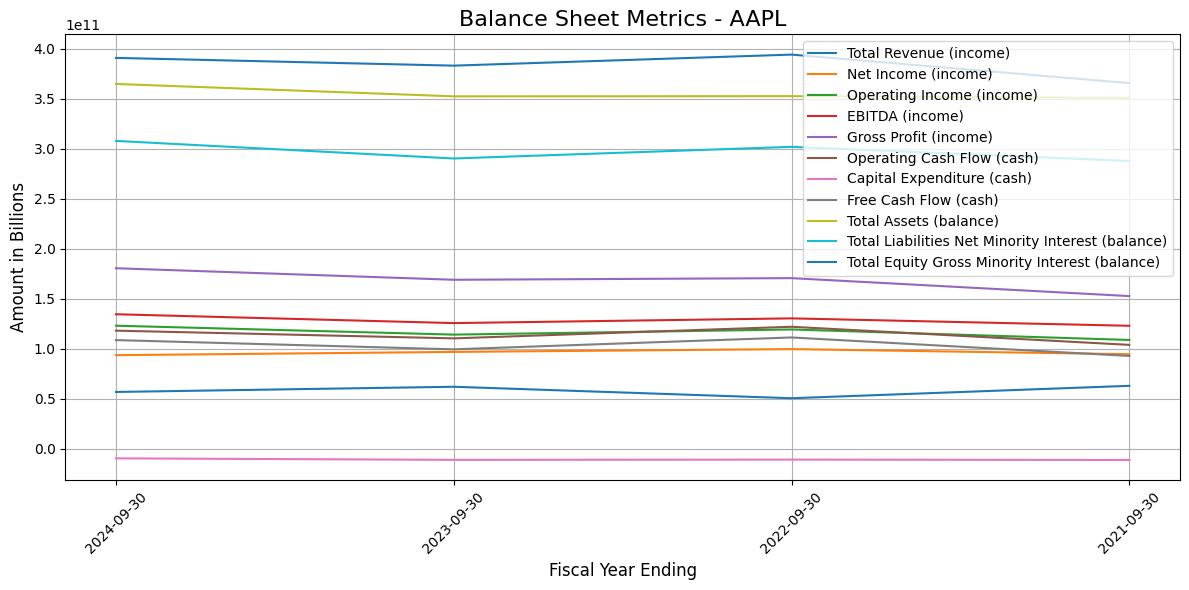


Plotting financial data for:  AAPL.NS


<ipython-input-9-48cc4029fa94>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-9-48cc4029fa94>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-9-48cc4029fa94>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


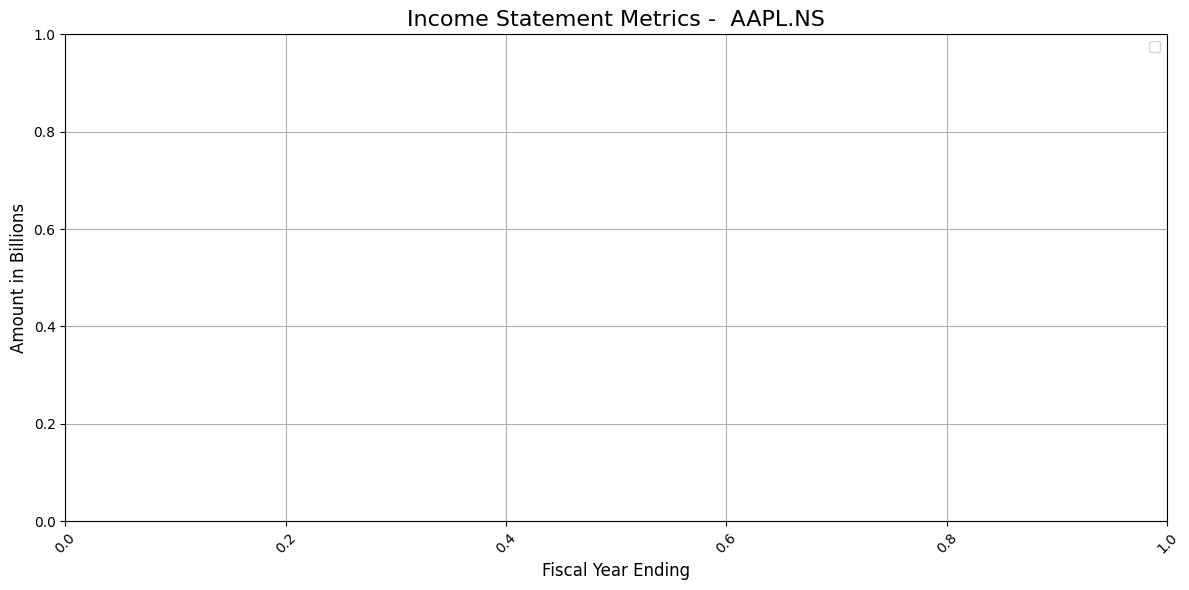


Plotting financial data for:  Infosys Ltd


<Figure size 1200x600 with 0 Axes>


Plotting financial data for: Infosys Ltd


<Figure size 1200x600 with 0 Axes>


Plotting financial data for: Apple Inc


<Figure size 1200x600 with 0 Axes>


Plotting financial data for: RELIANCE.NS


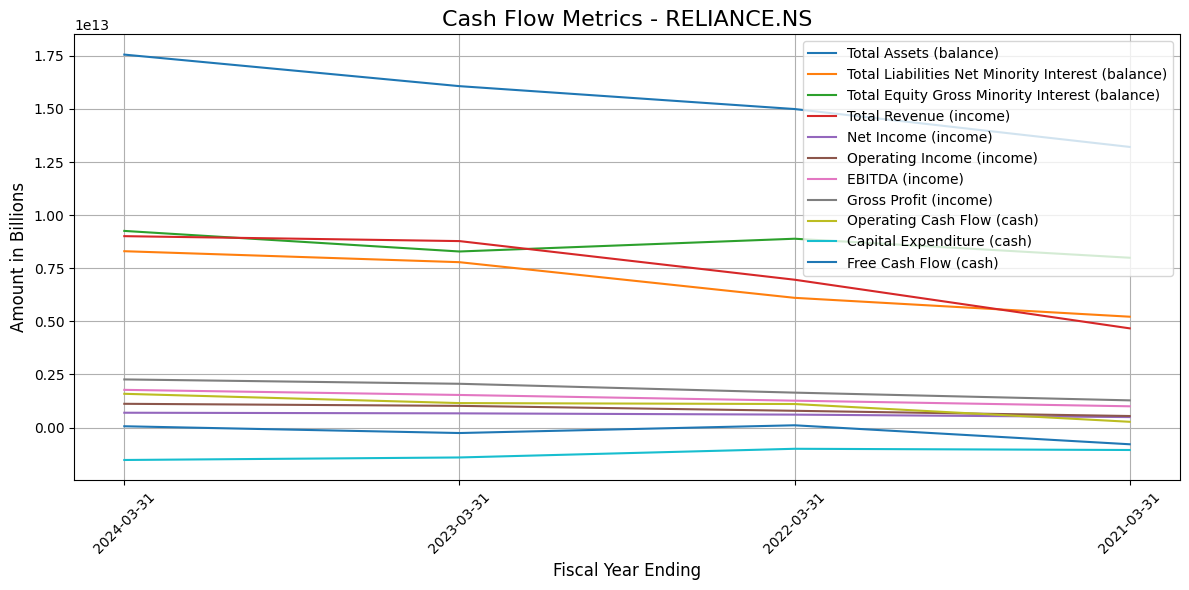


Plotting financial data for: Reliance


<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to financial data directory
financial_data_folder = "/content/financial_data"

def plot_financial_data_for_all_companies():
    """
    Automatically reads and plots financial data (Income Statement, Balance Sheet, and Cash Flow)
    for each company based on CSV files in the financial_data_folder.
    """

    csv_files = [f for f in os.listdir(financial_data_folder) if f.endswith('.csv')]

    company_files = {}
    for file in csv_files:
        company_ticker = file.split('_')[0]
        if company_ticker not in company_files:
            company_files[company_ticker] = []
        company_files[company_ticker].append(file)


    for company_ticker, files in company_files.items():
        print(f"\nPlotting financial data for: {company_ticker}")
        plt.figure(figsize=(12, 6))

        for file in files:
            file_path = os.path.join(financial_data_folder, file)
            df = pd.read_csv(file_path, index_col=0)
            df = df.transpose()


            if "income_statement" in file:
                key_metrics = ['Total Revenue', 'Net Income', 'Operating Income', 'EBITDA', 'Gross Profit']
                plot_title = "Income Statement Metrics"
            elif "balance_sheet" in file:
                key_metrics = ['Total Assets', 'Total Liabilities Net Minority Interest', 'Total Equity Gross Minority Interest']
                plot_title = "Balance Sheet Metrics"
            elif "cash_flow" in file:
                key_metrics = ['Operating Cash Flow', 'Capital Expenditure', 'Free Cash Flow']
                plot_title = "Cash Flow Metrics"
            else:
                continue

            # Plotting
            for metric in key_metrics:
                if metric in df.columns:
                    plt.plot(df.index, df[metric], label=f"{metric} ({file.split('_')[1]})")

            plt.title(f"{plot_title} - {company_ticker}", fontsize=16)
            plt.xlabel("Fiscal Year Ending", fontsize=12)
            plt.ylabel("Amount in Billions", fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.legend()

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    plot_financial_data_for_all_companies()
